In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import datetime as dt
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from statsmodels.formula.api import ols
import scipy.stats as sp
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, PowerTransformer, normalize
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as knn , KNeighborsRegressor as knr
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.manifold import TSNE
from functions import *
from math import radians, pi
import json
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
rfm = pd.read_csv("DATA/rfm.csv", index_col=0)
raw_data = pd.read_csv("DATA/raw_data.csv", index_col=0)

In [3]:
raw_data['order_purchase_timestamp'] = pd.to_datetime(raw_data['order_purchase_timestamp'])

For n_clusters = 2 The average silhouette_score is : 0.42871196698742287
For n_clusters = 3 The average silhouette_score is : 0.45910394389005243
For n_clusters = 4 The average silhouette_score is : 0.4635329186933711
For n_clusters = 5 The average silhouette_score is : 0.47587500985183045
For n_clusters = 6 The average silhouette_score is : 0.408521401387542


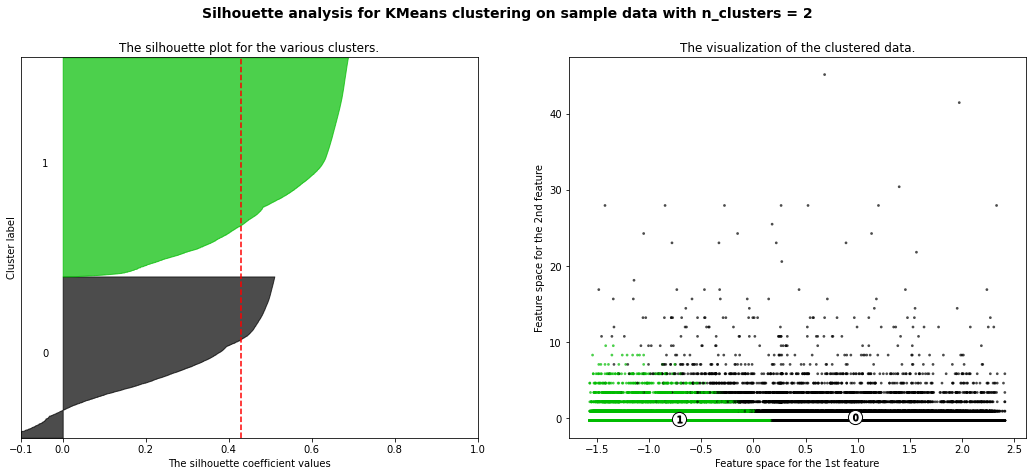

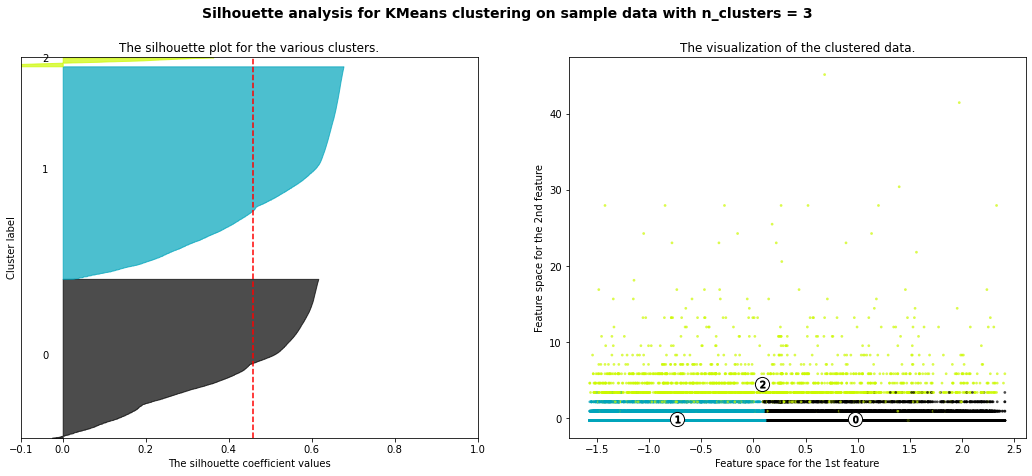

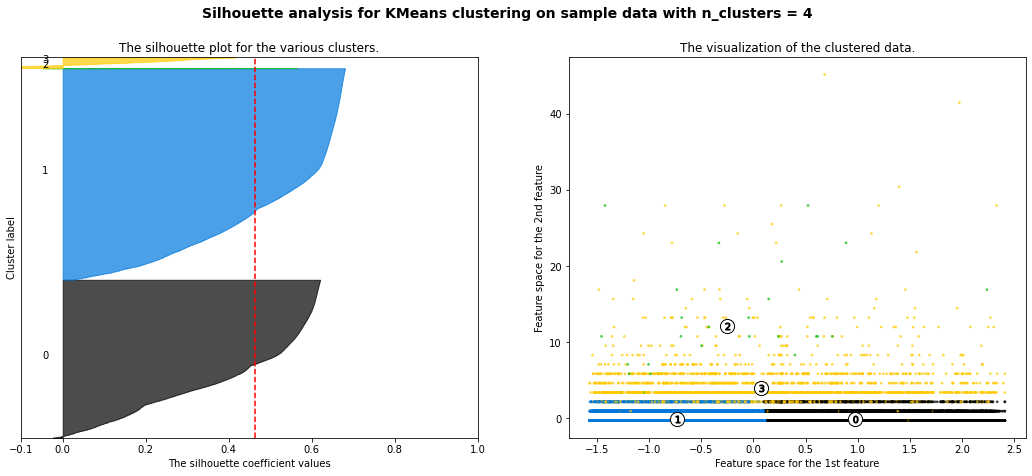

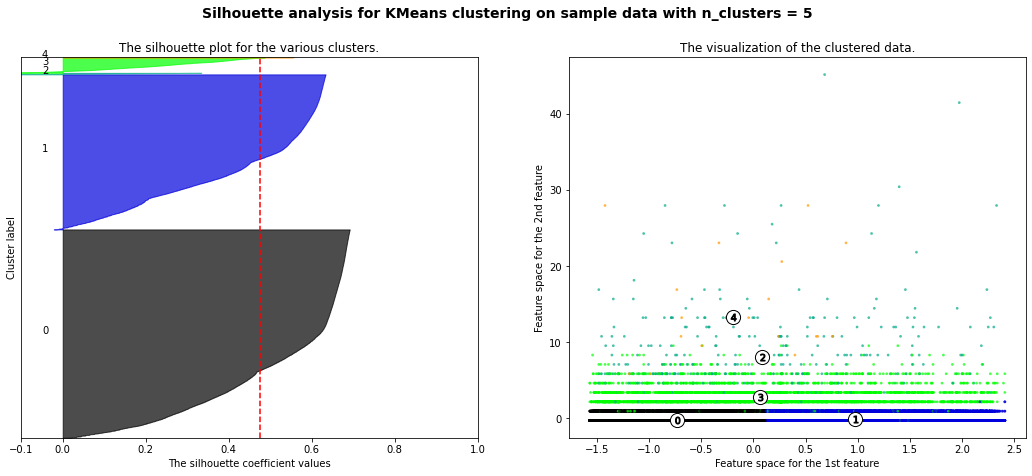

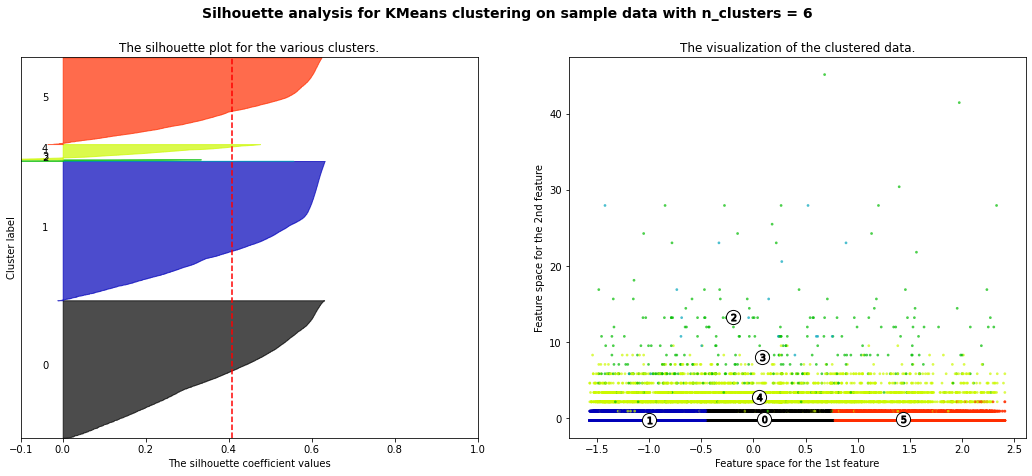

In [4]:
X = rfm.to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

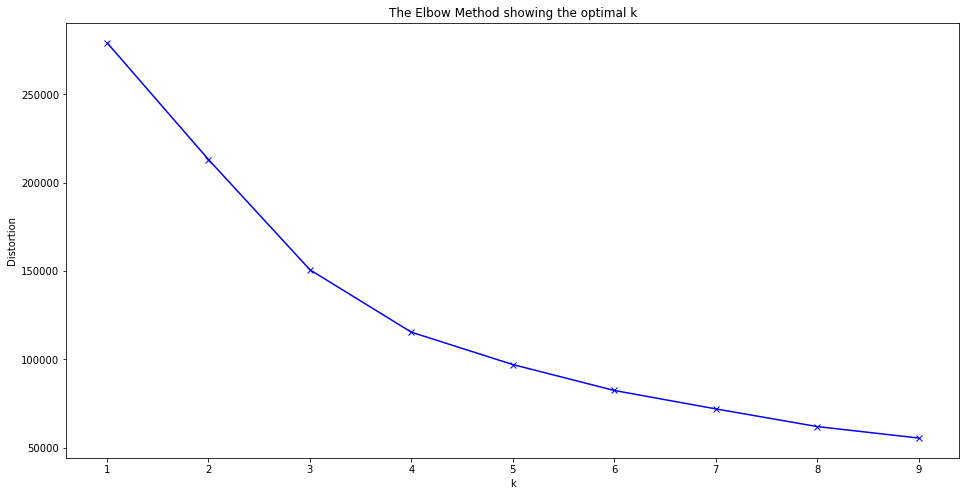

In [5]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

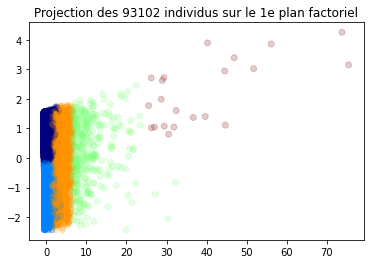

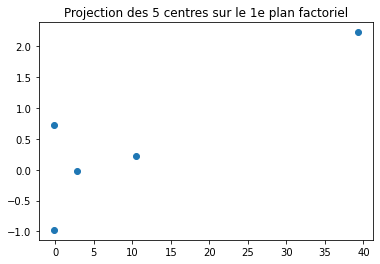

In [6]:
# Nombre de clusters souhaités
n_clust = 5

# préparation des données pour le clustering
# X = donnees.drop("is_genuine", axis = 1).values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)


# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

# Affichage des positions des centres de classes
plt.figure()
centroids5 = km.cluster_centers_
centroids_projected = pca.transform(centroids5)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids5)))
plt.show()

<AxesSubplot:>

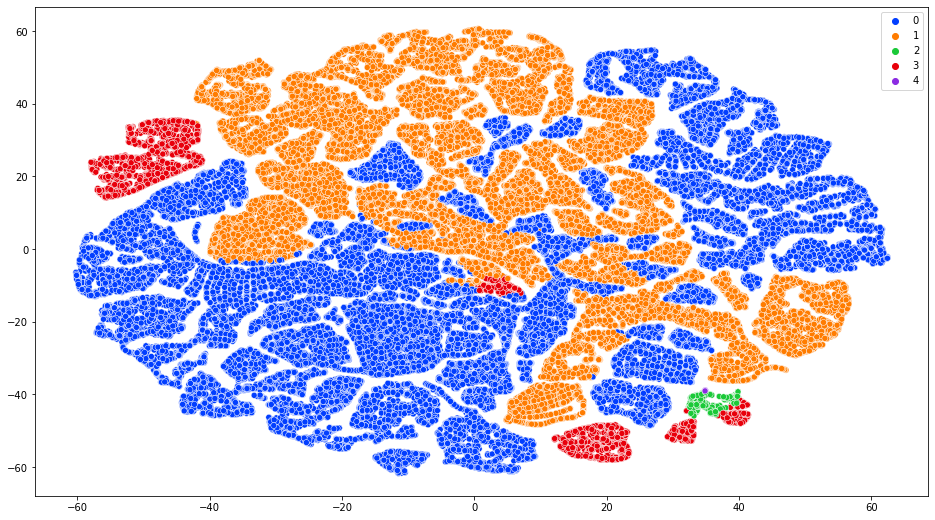

In [7]:
y = km.labels_
tsne = TSNE()
X_embedded = tsne.fit_transform(X)
fig, ax = plt.subplots(figsize=(16,9)) 
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette='bright')

In [8]:
rfm['kmeans'] = km.labels_

In [9]:
centroid = rfm.groupby('kmeans').mean()
centroid

,Recent,Frequency,Mount
kmeans,,,
0,126.689456,1.107070,165.737661
1,384.265377,1.117825,166.521670
2,249.237057,7.803815,3811.088692
3,246.233528,3.532944,811.871947
4,207.714286,12.095238,23009.541905


<AxesSubplot:xlabel='Recent', ylabel='Mount'>

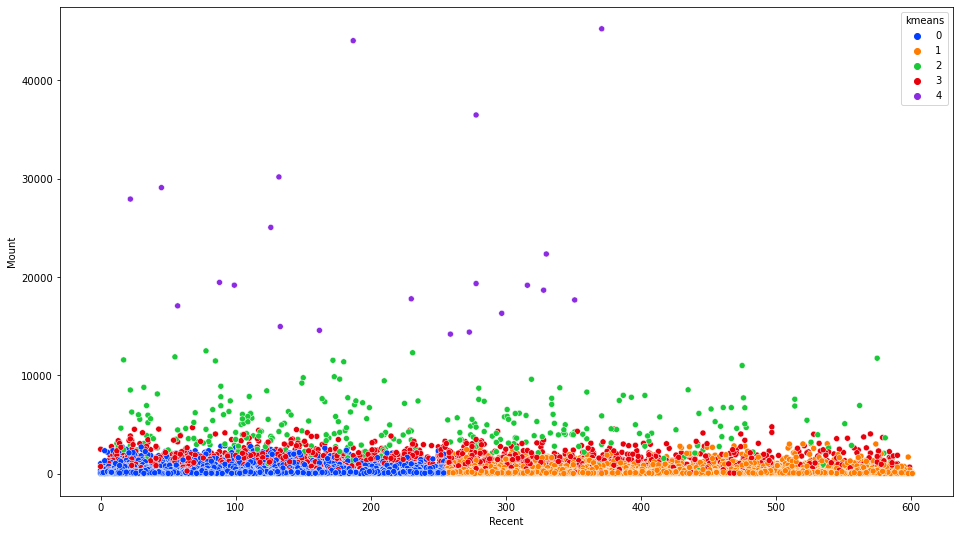

In [10]:
fig, ax = plt.subplots(figsize=(16,9)) 
sns.scatterplot(data = rfm, x='Recent', y='Mount', hue='kmeans', legend='full', palette='bright')

<AxesSubplot:xlabel='Recent', ylabel='Frequency'>

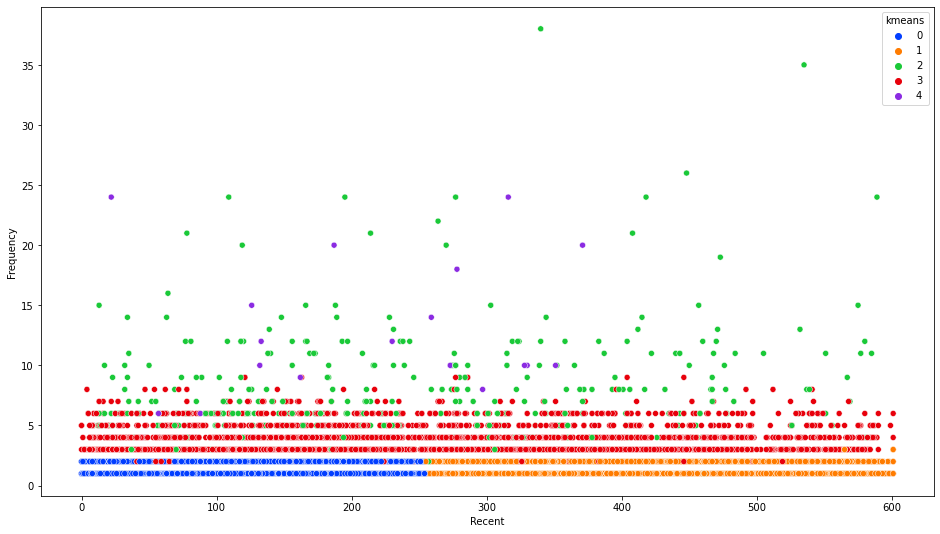

In [11]:
fig, ax = plt.subplots(figsize=(16,9)) 
sns.scatterplot(data = rfm, x='Recent', y='Frequency', hue='kmeans', legend='full', palette='bright')

In [12]:
centroid['Frequency'] = centroid['Frequency'].apply(lambda x: (x-rfm['Frequency'].min())/(rfm['Frequency'].max()-rfm['Frequency'].min()))
centroid['Recent'] = centroid['Recent'].apply(lambda x: (rfm['Recent'].max()-x)/(rfm['Recent'].max()-rfm['Recent'].min()))
centroid['Mount'] = centroid['Mount'].apply(lambda x: (x-rfm['Mount'].min())/(rfm['Mount'].max()-rfm['Mount'].min()))

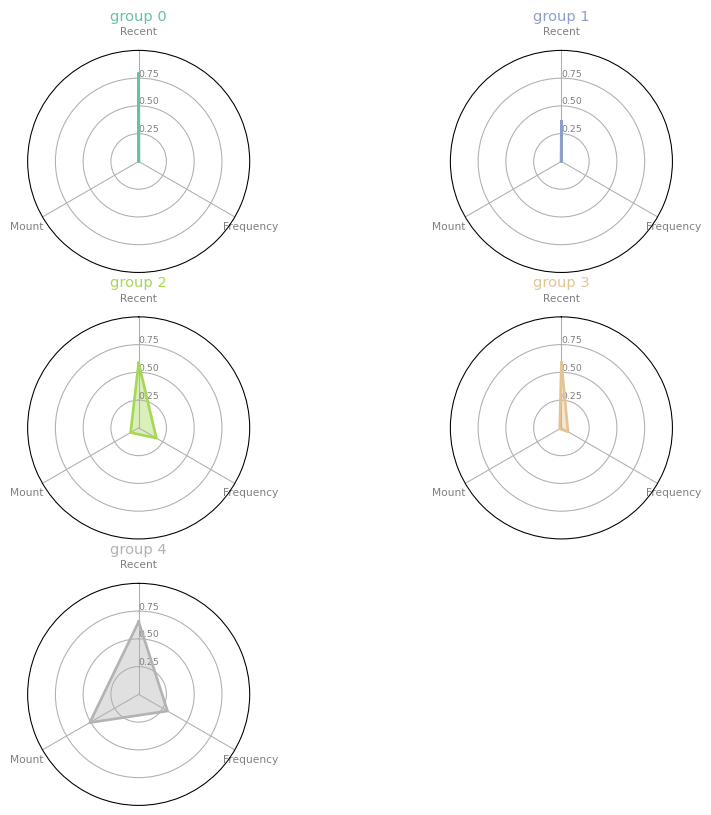

In [13]:

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(df, row, nb_plot, title, color):

    # number of variable
    categories=list(df.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(np.ceil(nb_plot/2),2,row+1, polar=True, )
    
    

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.50,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    labels = [["abcd"],["abcd"], ["abcd"]]
    
    # Ind1
    values=df.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(centroid.index))
 
# Loop to plot
nb_plot = len(centroid.index)

for row in range(0, nb_plot):
    make_spider(df=centroid, row=row, nb_plot=nb_plot, title='group '+str(centroid.index[row]), color=my_palette(row))

In [14]:
def formatage_donnees(raw_data):
    temp = raw_data.groupby(['customer_unique_id', 'Gross_category']).agg({'review_score':'mean', 'order_purchase_timestamp':'last','payment_value':'sum'})
    temp = temp.reset_index()
    temp = temp.pivot(index = ['customer_unique_id', 'order_purchase_timestamp', 'review_score'], columns = 'Gross_category', values = 'payment_value')
    temp = temp.reset_index()
    temp.columns.name = ''
    temp = temp.reindex()
    a = temp.groupby('customer_unique_id').agg({'review_score':'mean', 'order_purchase_timestamp':'last'})
    b = temp.drop(['review_score', 'order_purchase_timestamp'],axis = 1).groupby('customer_unique_id').sum()
    temp = pd.merge(a, b, left_index = True, right_index = True)
    temp = temp.rename(columns={'order_purchase_timestamp':'Recent'})
    temp['Recent'] = raw_data['order_purchase_timestamp'].max() - temp['Recent']
    temp['Recent'] = temp['Recent'].apply(lambda x: x.days)
    temp = temp.fillna(0)
    
    return temp

In [15]:
raw_data.order_purchase_timestamp.min() - raw_data.order_purchase_timestamp.max()

Timedelta('-602 days +20:55:29')

In [16]:
temp = formatage_donnees(raw_data)

In [17]:
X = temp.to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

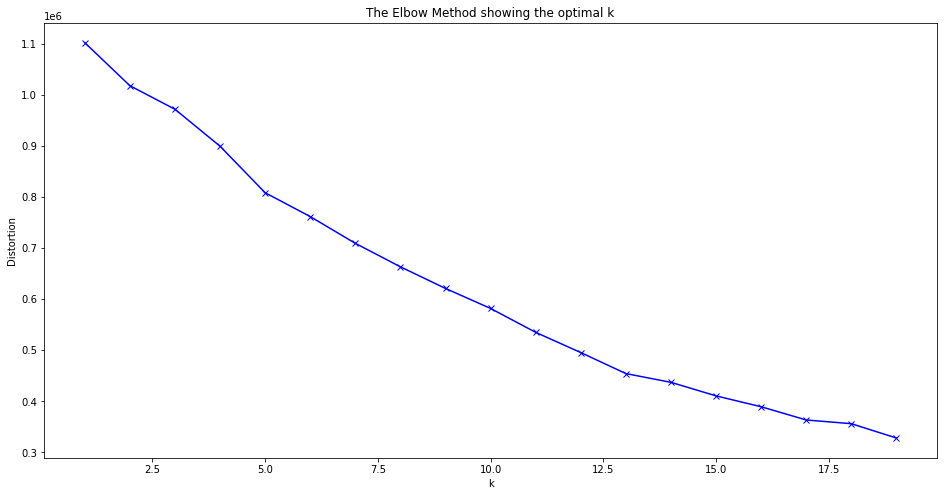

In [18]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.9901089983876127
For n_clusters = 4 The average silhouette_score is : 0.3187181058552974
For n_clusters = 6 The average silhouette_score is : 0.24783460574377986
For n_clusters = 8 The average silhouette_score is : 0.256426122483069
For n_clusters = 10 The average silhouette_score is : 0.2688618578107693
For n_clusters = 12 The average silhouette_score is : 0.28198491536689674
For n_clusters = 14 The average silhouette_score is : 0.286757465868871
For n_clusters = 16 The average silhouette_score is : 0.29571777929827925
For n_clusters = 18 The average silhouette_score is : 0.21260238377202634


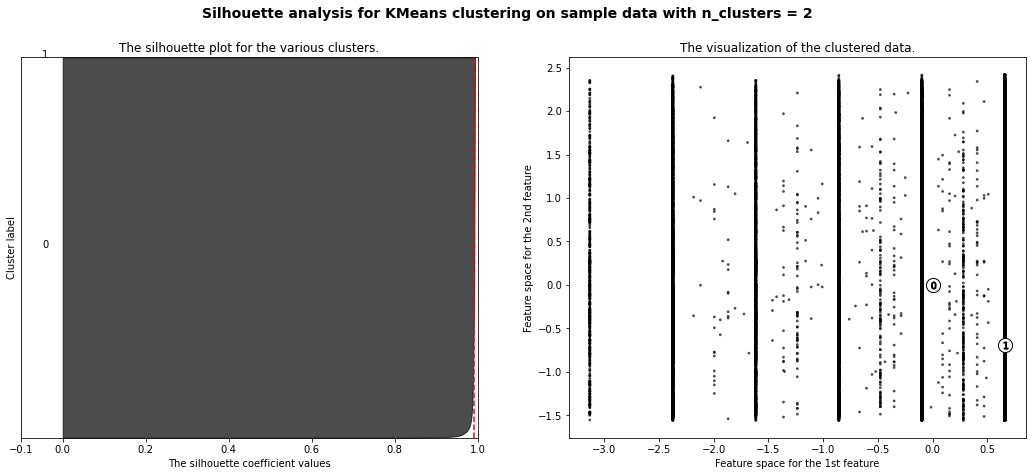

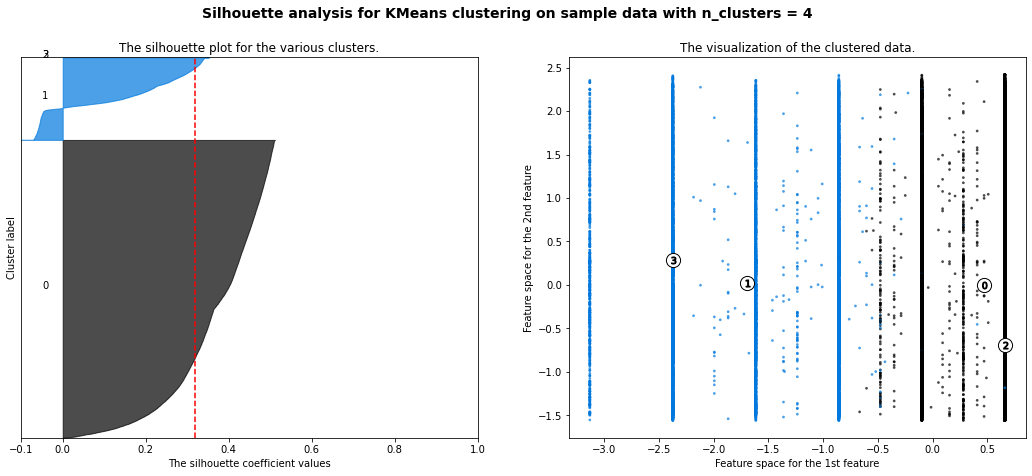

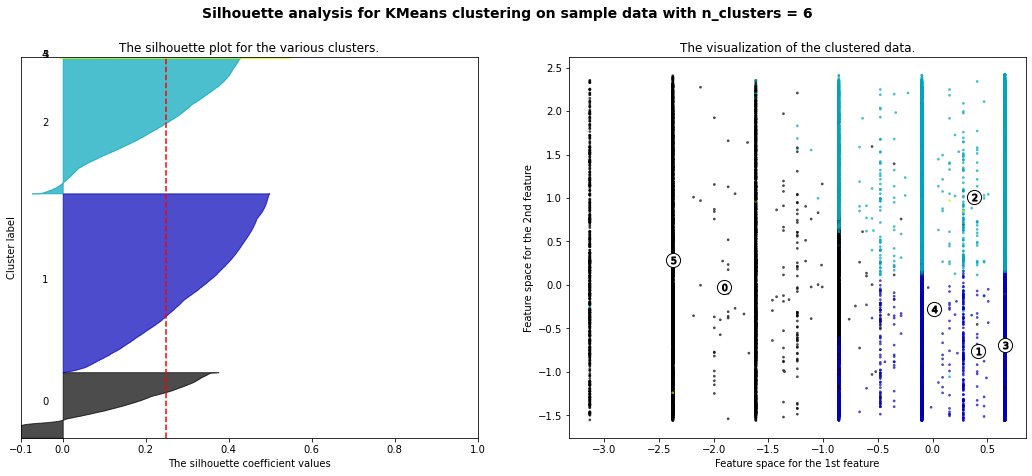

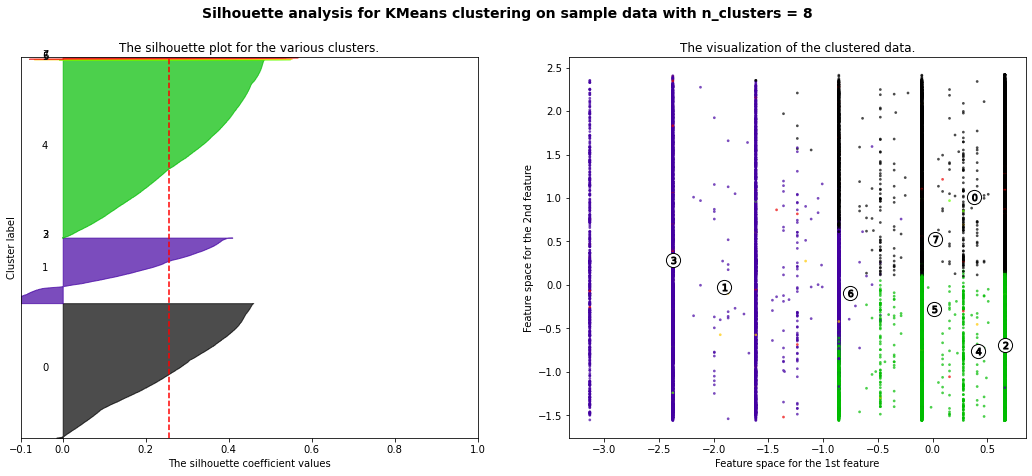

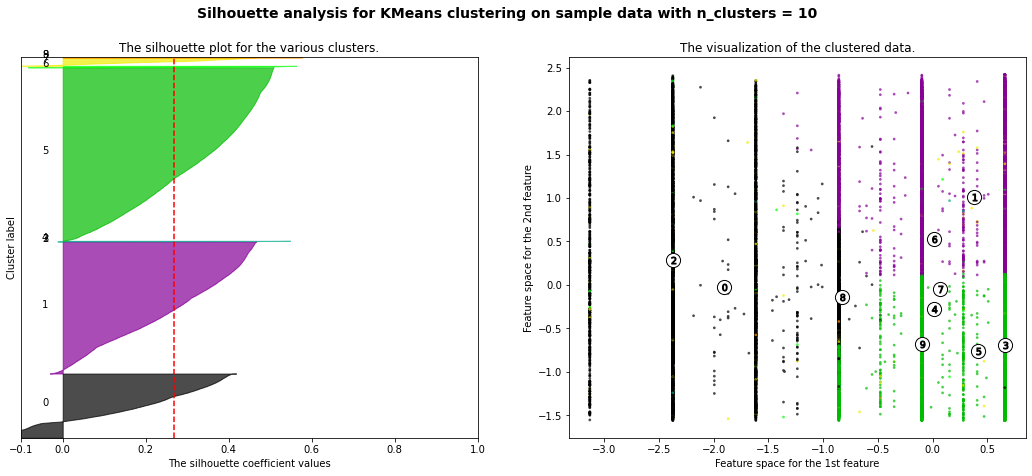

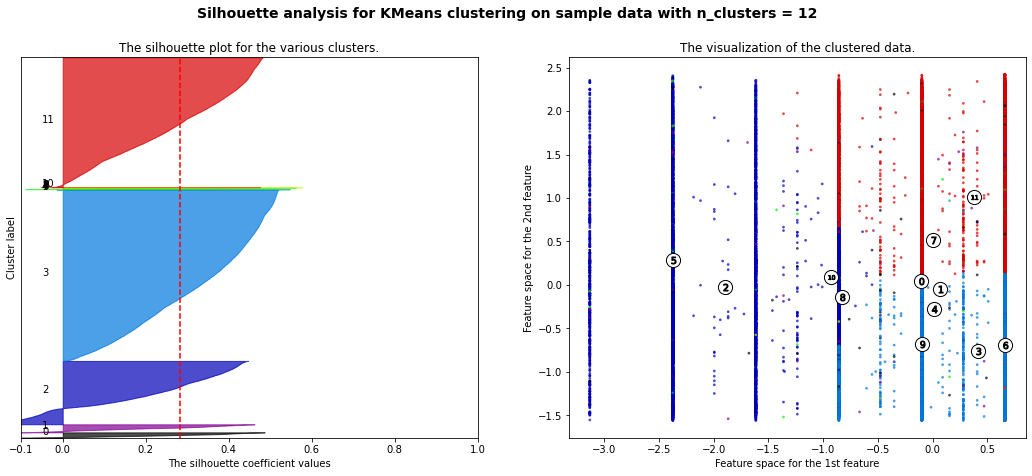

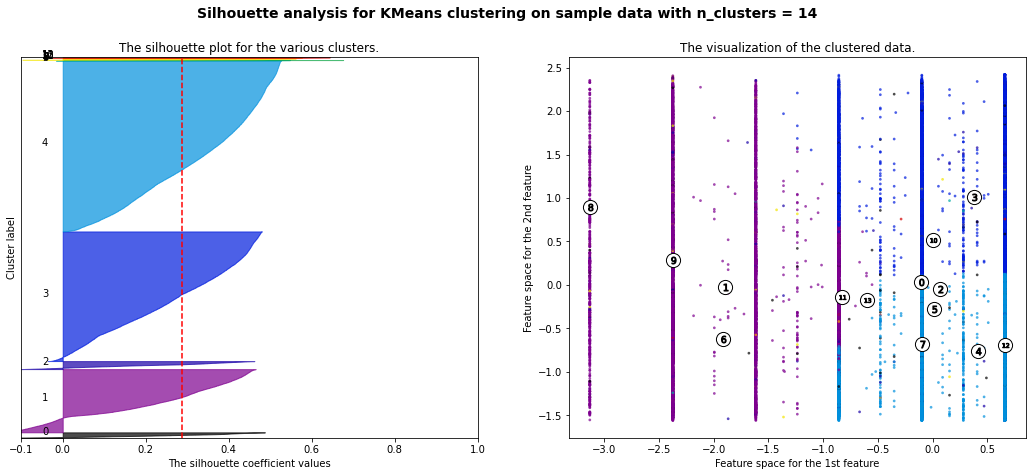

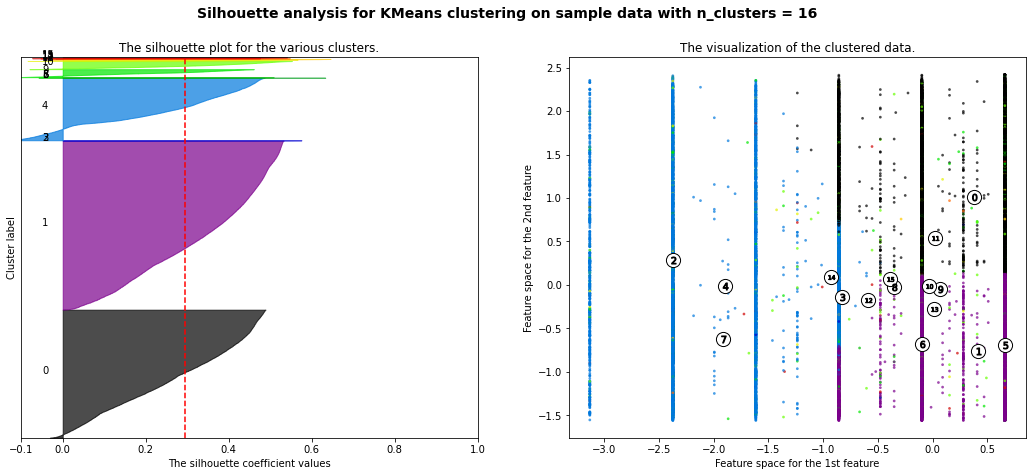

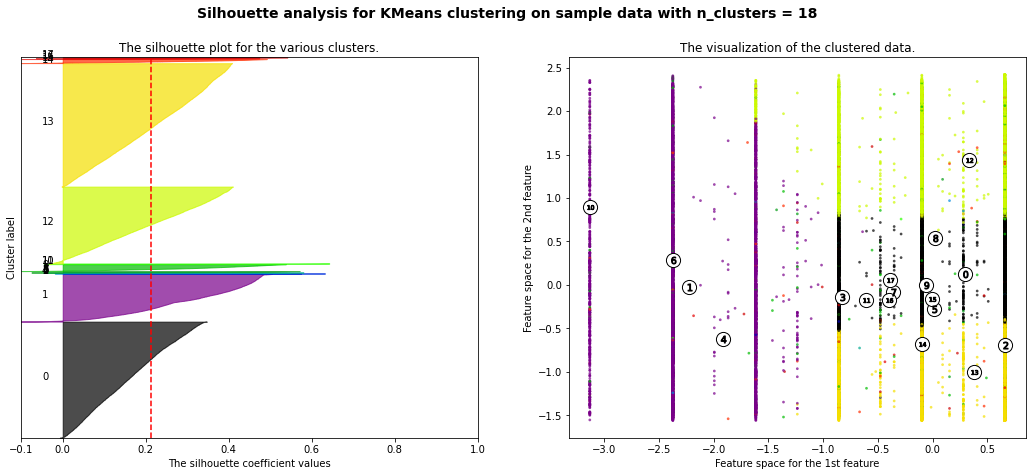

In [19]:

range_n_clusters = [2, 4, 6, 8, 10, 12, 14, 16, 18]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

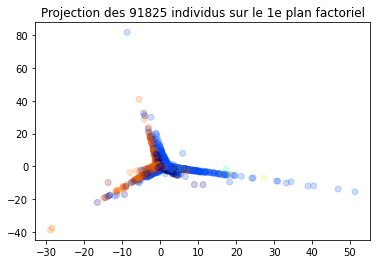

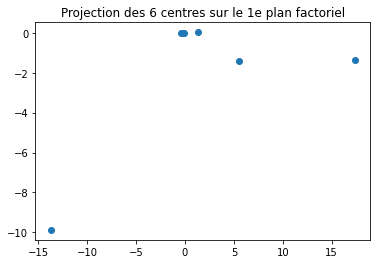

In [20]:
# Nombre de clusters souhaités
n_clust = 6

# préparation des données pour le clustering
# X = donnees.drop("is_genuine", axis = 1).values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)


# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

# Affichage des positions des centres de classes
plt.figure()
centroids5 = km.cluster_centers_
centroids_projected = pca.transform(centroids5)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids5)))
plt.show()

<AxesSubplot:>

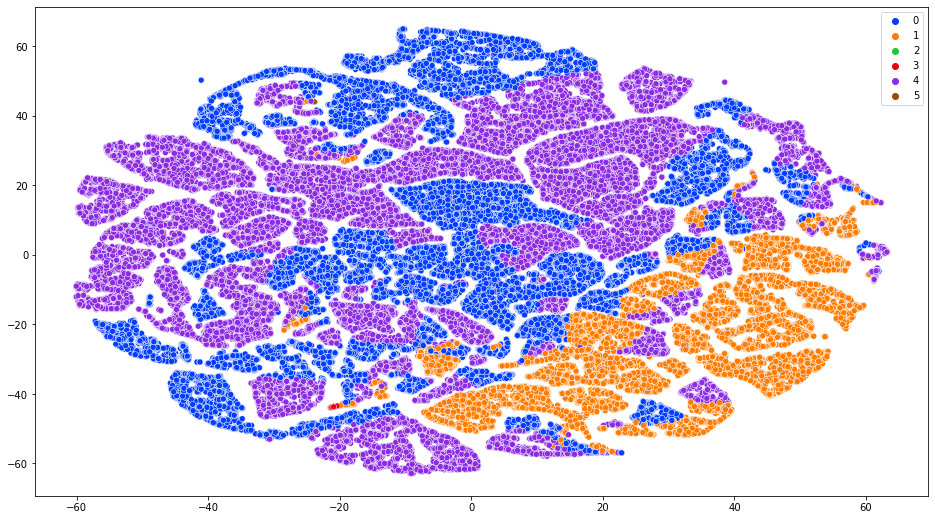

In [21]:
y = km.labels_
tsne = TSNE()
X_embedded = tsne.fit_transform(X)
fig, ax = plt.subplots(figsize=(16,9)) 
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette='bright')

In [22]:
temp['kmeans'] = km.labels_
centroid = temp.groupby('kmeans').mean()

In [23]:
centroid.describe()

,review_score,Recent,Alimentation,Animaux,Autre,Bricolage,Cosmétique&habillement,Domotique&electronique,Industry,Loisir,Meubles,Nursery
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.363687,230.727586,5031.599744,1.568568,4.591024,19.572303,13.729190,1478.840643,6082.274285,24.647171,34.242557,3.300283
std,1.712189,98.950035,12323.089099,1.818984,6.150093,17.806180,15.115224,3571.943676,14896.310150,26.462600,46.644083,4.202019
min,1.000000,120.448142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.025821,157.204307,0.187049,0.000000,0.000000,4.410855,0.000000,7.335305,0.162378,0.585686,0.000000,0.000000
50%,3.949631,232.849791,1.037697,1.263838,2.034908,19.125601,12.655445,30.352590,1.230624,22.557770,21.373332,1.994907
75%,4.661139,266.720588,1.474103,2.626607,7.252894,32.945377,26.603243,39.629849,1.911280,46.294209,43.393847,5.036256
max,5.000000,388.217792,30186.000000,4.224146,15.162406,42.124706,30.030221,8769.953529,36489.240000,55.299469,119.099103,10.426812


In [24]:
centroid

,review_score,Recent,Alimentation,Animaux,Autre,Bricolage,Cosmétique&habillement,Domotique&electronique,Industry,Loisir,Meubles,Nursery
kmeans,,,,,,,,,,,,
0,4.629730,388.217792,0.748196,2.527675,15.162406,17.643418,27.034027,29.341219,0.649512,47.468014,43.609574,3.989813
1,1.611250,232.817228,1.327198,2.659585,8.313920,37.057908,25.310889,42.385145,1.811736,55.299469,119.099103,10.426812
2,1.000000,278.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36489.240000,0.000000,0.000000,0.000000
3,3.269532,232.882353,0.000000,0.000000,0.000000,42.124706,0.000000,8769.953529,0.000000,2.342745,0.000000,0.000000
4,4.671608,120.448142,1.523072,4.224146,4.069816,20.607784,30.030221,31.363962,1.944461,42.772796,42.746665,5.385071
5,5.000000,132.000000,30186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
plot_centroid = centroid.copy()

In [26]:
for i in plot_centroid.columns:
    if i == 'Recent':
        plot_centroid[i] = plot_centroid[i].apply(lambda x: (plot_centroid[i].max()-x)/(plot_centroid[i].max()-plot_centroid[i].min()))
    else: 
        plot_centroid[i] = plot_centroid[i].apply(lambda x: (x-plot_centroid[i].min())/(plot_centroid[i].max()-plot_centroid[i].min()))

In [27]:
plot_centroid

,review_score,Recent,Alimentation,Animaux,Autre,Bricolage,Cosmétique&habillement,Domotique&electronique,Industry,Loisir,Meubles,Nursery
kmeans,,,,,,,,,,,,
0,0.907433,0.000000,0.000025,0.598387,1.000000,0.418838,0.900227,0.003346,0.000018,0.858381,0.366162,0.382649
1,0.152813,0.580352,0.000044,0.629615,0.548325,0.879719,0.842847,0.004833,0.000050,1.000000,1.000000,1.000000
2,0.000000,0.411614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.567383,0.580108,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.042365,0.000000,0.000000
4,0.917902,1.000000,0.000050,1.000000,0.268415,0.489209,1.000000,0.003576,0.000053,0.773476,0.358917,0.516464
5,1.000000,0.956859,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


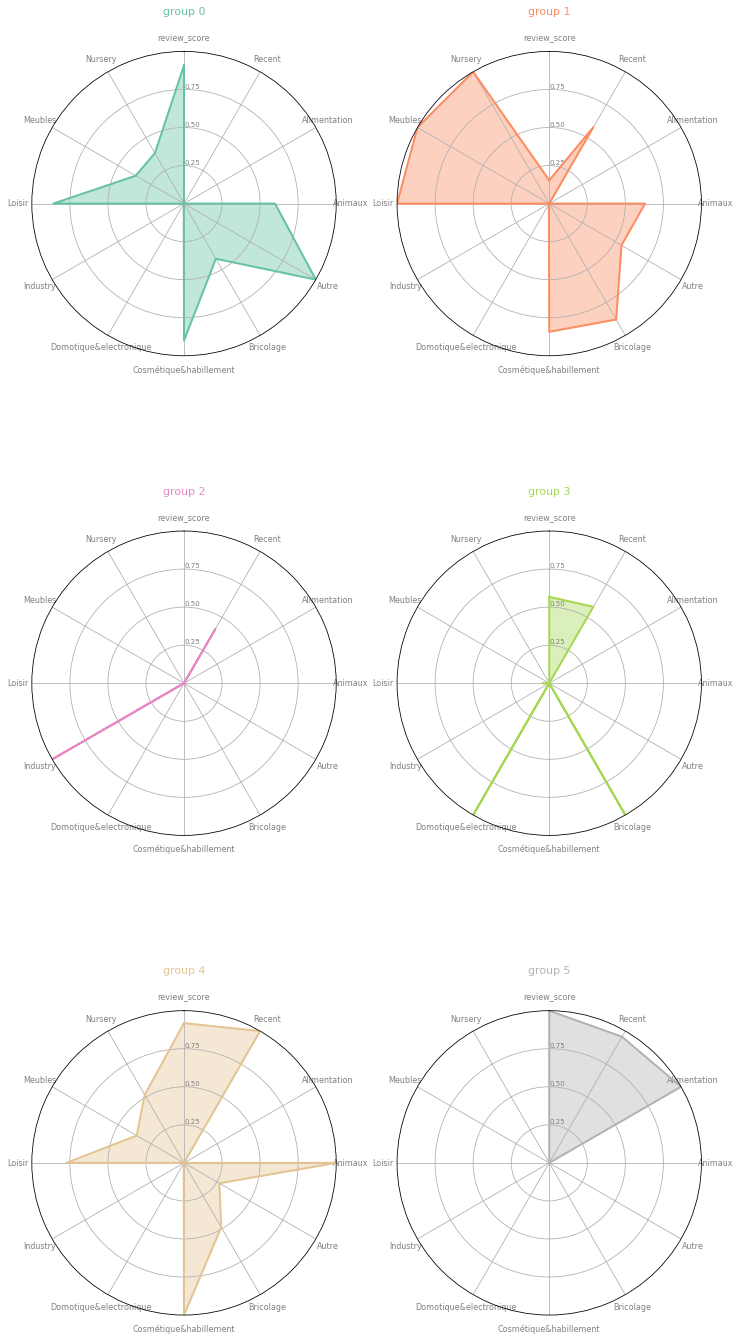

In [28]:

# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider(df, row, nb_plot, title, color):

    # number of variable
    categories=list(df.columns)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(np.ceil(nb_plot/2),2,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.50,0.75], ["0.25","0.50","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=df.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(12,25))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(plot_centroid.index))
 
# Loop to plot
nb_plot = len(plot_centroid.index)

for row in range(0, nb_plot):
    make_spider(df=plot_centroid, row=row, nb_plot=nb_plot, title='group '+str(plot_centroid.index[row]), color=my_palette(row))

In [29]:
df_unique = formatage_donnees(raw_data)
df_unique.shape

(91825, 12)

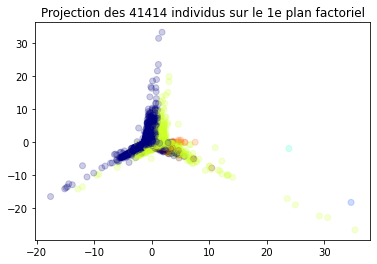

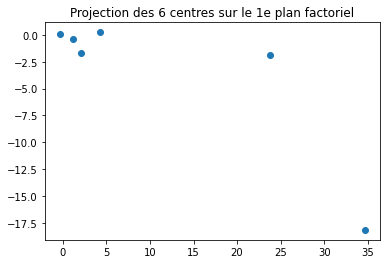

In [30]:
df_reference = raw_data[raw_data['year'] == 2017]
temp = formatage_donnees(df_reference)

X = temp.to_numpy()

scaler = StandardScaler()
X = scaler.fit_transform(X)


# préparation des données pour le clustering
# X = donnees.drop("is_genuine", axis = 1).values

# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
# X_scaled = preprocessing.StandardScaler().fit_transform(X)


# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = PCA(n_components=3).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

# Affichage des positions des centres de classes
plt.figure()
centroids5 = km.cluster_centers_
centroids_projected = pca.transform(centroids5)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids5)))
plt.show()

In [31]:
temp['kmeans_init'] = km.labels_
df_unique = pd.merge(df_unique, temp['kmeans_init'], left_index = True, right_index = True, how='left')

In [32]:
df_unique.index.nunique()

91825

In [33]:
df_unique

,review_score,Recent,Alimentation,Animaux,Autre,Bricolage,Cosmétique&habillement,Domotique&electronique,Industry,Loisir,Meubles,Nursery,kmeans_init
customer_unique_id,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.0,111,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,141.9,0.00,NaN
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,114,0.0,0.0,0.0,0.00,27.19,0.00,0.0,0.00,0.0,0.00,NaN
0000f46a3911fa3c0805444483337064,3.0,536,0.0,0.0,0.0,0.00,0.00,0.00,0.0,86.22,0.0,0.00,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0,320,0.0,0.0,0.0,0.00,0.00,43.62,0.0,0.00,0.0,0.00,0.0
0004aac84e0df4da2b147fca70cf8255,5.0,287,0.0,0.0,0.0,0.00,0.00,196.89,0.0,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,5.0,446,0.0,0.0,0.0,0.00,4134.84,0.00,0.0,0.00,0.0,0.00,0.0
fffea47cd6d3cc0a88bd621562a9d061,4.0,261,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,84.58,0.0
ffff371b4d645b6ecea244b27531430a,5.0,567,0.0,0.0,0.0,112.46,0.00,0.00,0.0,0.00,0.0,0.00,0.0


In [34]:
df_move = raw_data.copy()

In [35]:
decalage = 1

for i in df_move.year.unique():
    mask = df_move['year'] == i
    l_month = df_move.loc[mask, "month"].unique()
    for j in l_month :
        
        mask = (df_move['year'] == i) & (df_move['month'] >= j) | (df_move['year'] == (i+1)) & (df_move['month'] <= j)
        temp = df_move.loc[mask, :]
        temp = formatage_donnees(temp)
        
        # Standardisation
        X = temp.to_numpy()
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        # Clustering par K-means
        km = KMeans(n_clusters=n_clust)
        km.fit(X)
        
        nom_col = "decalage_" + str(decalage)
        
        temp[nom_col] = km.labels_
        df_unique = pd.merge(df_unique, temp[nom_col], left_index = True, right_index = True, how='left')
        
        decalage +=1

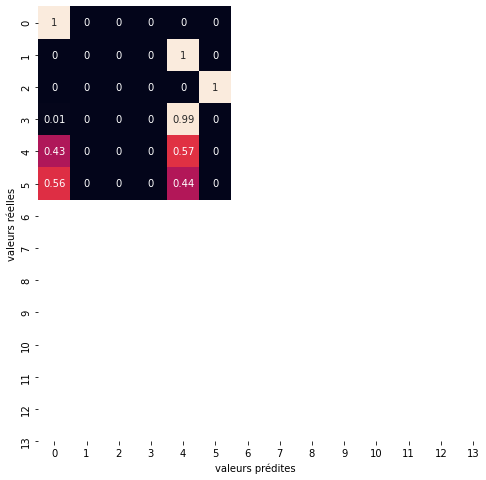

In [36]:
ene = df_unique.loc[:, ['kmeans_init', 'decalage_6']].dropna()
conf = np.round(confusion_matrix(ene['kmeans_init'], ene['decalage_6'], normalize='true'), 2)
plt.subplots(figsize=(16,8))
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(np.arange(0,14))
            , yticklabels=list(np.arange(0,14)), fmt='g')
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

In [37]:
ene = df_unique.loc[:, ['kmeans_init', 'decalage_3']].dropna()
ene.shape

(12796, 2)

In [38]:
precision_score = []
score_list = []
for i in range(1, 9):
    name = 'decalage_' + str(i)
    ene = df_unique.loc[:, ['kmeans_init', name]].dropna()
    conf = confusion_matrix(ene['kmeans_init'], ene[name], normalize='true')
    #plt.subplots(figsize=(16,8))
    #sns.heatmap(conf, square=True, annot=True, cbar=False
    #            , xticklabels=list(np.arange(0,14))
    #            , yticklabels=list(np.arange(0,14)), fmt='g')
    #plt.xlabel('valeurs prédites')
    #plt.ylabel('valeurs réelles');
    for i in range(0, conf.shape[0]-1, 1):
        precision_score.append(conf[i,:].max())
    score_list.append(np.round(np.mean(precision_score),2))

In [39]:
precision_score = []
score_list = []
for i in range(1, decalage):
    name = 'decalage_' + str(i)
    ene = df_unique.loc[:, ['kmeans_init', name]].dropna()
    score_list.append(adjusted_rand_score(ene["kmeans_init"], ene[name]))
    #plt.subplots(figsize=(16,8))
    #sns.heatmap(conf, square=True, annot=True, cbar=False
    #            , xticklabels=list(np.arange(0,14))
    #            , yticklabels=list(np.arange(0,14)), fmt='g')
    #plt.xlabel('valeurs prédites')
    #plt.ylabel('valeurs réelles');

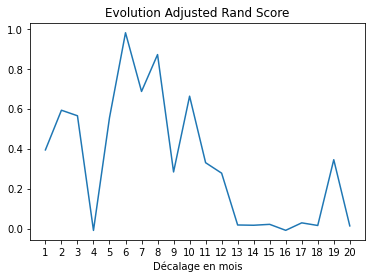

In [40]:
plt.plot(range(1,decalage), score_list)
plt.title("Evolution Adjusted Rand Score")
plt.xlabel('Décalage en mois')
plt.xticks(range(1,decalage))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')